## Información general del dataset

In [15]:
import pandas as pd

# Lee solo las primeras 20,000 filas del archivo JSON por cuestiones de rendimiento
df = pd.read_json('D:\\HENRY REPO\\Proyecto Final\\YELP\\review.json', lines=True, nrows=200000)

df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [2]:
# Tamaño de Dataset

df.shape 

(200000, 9)

In [3]:
# Observacion de los tipos de datos del dataset y mas informacion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    200000 non-null  object        
 1   user_id      200000 non-null  object        
 2   business_id  200000 non-null  object        
 3   stars        200000 non-null  int64         
 4   useful       200000 non-null  int64         
 5   funny        200000 non-null  int64         
 6   cool         200000 non-null  int64         
 7   text         200000 non-null  object        
 8   date         200000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 13.7+ MB


In [ ]:
df.dtypes

# Las columnas estan bien representadas por cada tipo de valor

review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

In [5]:
# Obsevamos las columnas del dataset

df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [8]:
# OBERVAMOS VALORES UNICOS

print('\nvalores unicos stars: ', df.stars.unique())
print('\nvalores unicos useful: ', df.useful.unique())
print('\nvalores unicos funny: ', df.funny.unique())
print('\nvalores unicos cool: ', df.cool.unique())



valores unicos stars:  [3 5 4 1 2]

valores unicos useful:  [  0   1   2   4   3   7  15   5  14   6  11  13   8   9  10  12  16  23
  18  19  34  17  20  61  31  91  54  21  22  28  32  25  29  48  33  27
  46  24 171  30  44  26  70  42  40  39  35  38 320  41  45  37  75  36
  53  74  49  60  43]

valores unicos funny:  [ 0  2  1  5  3  4  6 12 19  9  7 10 11 13 26  8 25 18 15 21 16 14 24 17
 22 20 38 27 23 98 30 32 28 39 76 33 40 44]

valores unicos cool:  [ 0  1  2  3  4  9  5  6  7  8 12 11 13 10 44 15 14 32 17 19 23 21 26 22
 27 29 25 49 31 16 33 24 18 41 42 20 37 35 45 28]


## Visualización general

heatmap de correlación (Mapa de correlaciones)

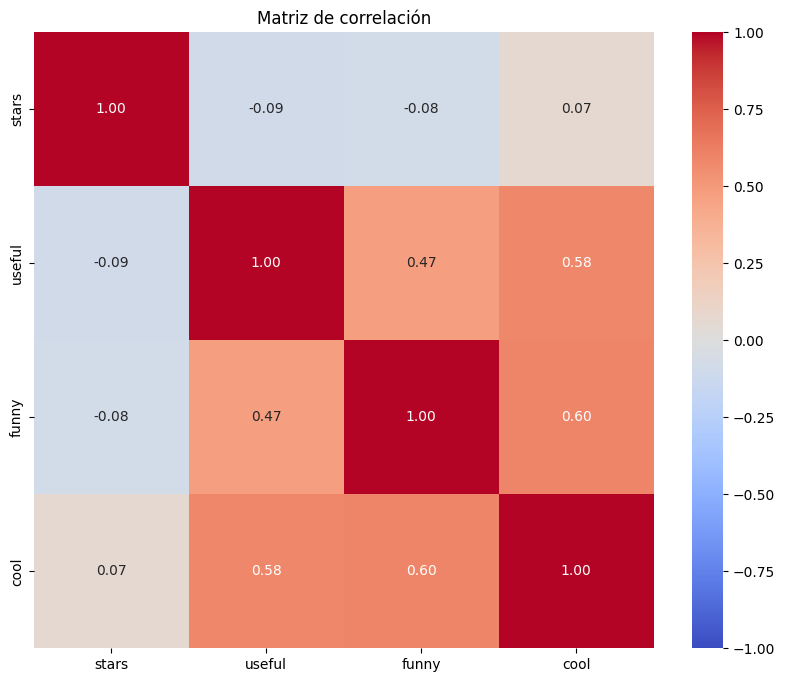

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.fillna('NAN').corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.show()

Existe cierta relacion directamente proporcional entre las columnas 'cool' con 'funny', lo mismo con la columna 'cool' con 'useful'

## Valores faltantes (Missing values)

In [11]:
# Verificamos si existen valores nulos

df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

## Duplicados

In [16]:
# Verificamos si existen valores duplicados

df.duplicated().sum()

0

## Distribución y valores atípicos (outliers)

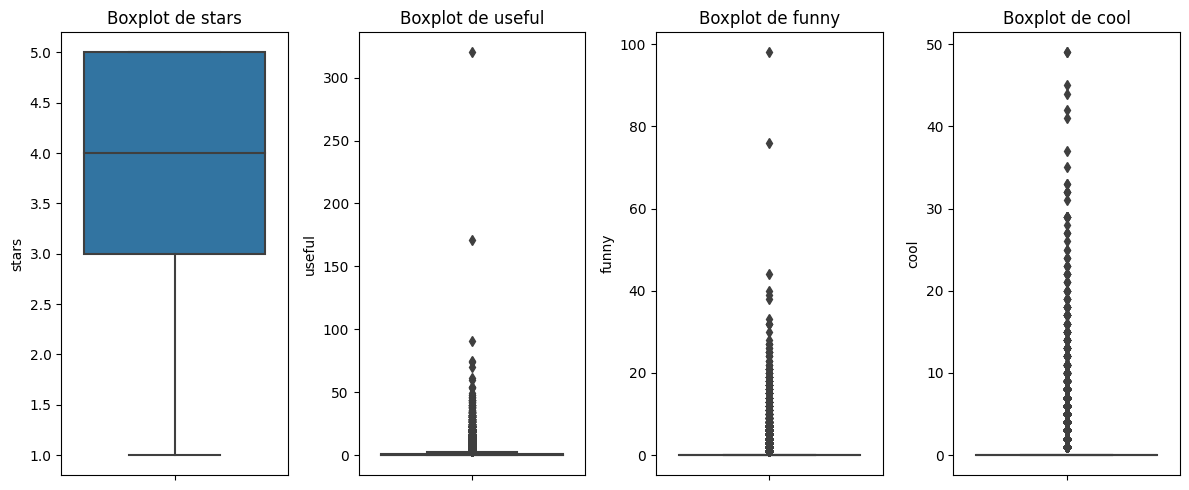

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes estas 4 columnas numéricas
columnas = ['stars', 'useful', 'funny', 'cool']

# Convertimos el DataFrame a formato largo (long-form)
df_long = df.iloc[:, :11][columnas].melt(var_name='Variable', value_name='Valor')

# Creamos una figura con 2x2 subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 5))  # 2 filas, 2 columnas
axs = axs.flatten()  # aplanamos para acceder más fácil

# Para cada variable, hacemos un boxplot en un subplot
for i, variable in enumerate(columnas):

    sns.boxplot(y=df.iloc[:, :11][variable], ax=axs[i], )
    axs[i].set_title(f'Boxplot de {variable}')

# Ajustamos espacios
plt.tight_layout()
plt.show()